In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
sns.set_style("whitegrid")

print("Libraries imported successfully.")

Libraries imported successfully.


load the benin data from data folder

In [4]:

file_path = file_path = '../data/benin-malanville.csv'
df = pd.read_csv(file_path)

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')

print(f"Data loaded successfully with {len(df)} rows and {len(df.columns)} columns.")

Data loaded successfully with 525600 rows and 18 columns.


Summary Statistics and missing value report

In [5]:
print("\n--- 1. Summary Statistics ---")
print(df.describe().T)


--- 1. Summary Statistics ---
                  count        mean         std    min    25%    50%    75%  \
GHI            525600.0  240.559452  331.131327  -12.9   -2.0    1.8  483.4   
DNI            525600.0  167.187516  261.710501   -7.8   -0.5   -0.1  314.2   
DHI            525600.0  115.358961  158.691074  -12.6   -2.1    1.6  216.3   
ModA           525600.0  236.589496  326.894859    0.0    0.0    4.5  463.7   
ModB           525600.0  228.883576  316.536515    0.0    0.0    4.3  447.9   
Tamb           525600.0   28.179683    5.924297   11.0   24.2   28.0   32.3   
RH             525600.0   54.487969   28.073069    2.1   28.8   55.1   80.1   
WS             525600.0    2.121113    1.603466    0.0    1.0    1.9    3.1   
WSgust         525600.0    2.809195    2.029120    0.0    1.3    2.6    4.1   
WSstdev        525600.0    0.473390    0.273395    0.0    0.4    0.5    0.6   
WD             525600.0  153.435172  102.332842    0.0   59.0  181.0  235.1   
WDstdev        525600

In [6]:
print("\n--- 2. Missing Value Report ---")
missing_data = df.isnull().sum()
total_rows = len(df)

# Calculate percentage of nulls
missing_percent = (missing_data / total_rows) * 100
missing_df = pd.DataFrame({'Total Missing': missing_data, 'Percentage': missing_percent})

print(missing_df.sort_values(by='Percentage', ascending=False))

# List columns with >5% nulls
high_nulls = missing_df[missing_df['Percentage'] > 5]
if not high_nulls.empty:
    print("\nColumns with >5% nulls:")
    print(high_nulls)
else:
    print("\nNo columns found with >5% null values.")


--- 2. Missing Value Report ---
               Total Missing  Percentage
Comments              525600       100.0
GHI                        0         0.0
DNI                        0         0.0
DHI                        0         0.0
ModB                       0         0.0
ModA                       0         0.0
RH                         0         0.0
WS                         0         0.0
WSgust                     0         0.0
Tamb                       0         0.0
WSstdev                    0         0.0
WD                         0         0.0
BP                         0         0.0
WDstdev                    0         0.0
Cleaning                   0         0.0
Precipitation              0         0.0
TModA                      0         0.0
TModB                      0         0.0

Columns with >5% nulls:
          Total Missing  Percentage
Comments         525600       100.0


Outlier detection 

In [9]:
# Target columns for Z-score calculation
Z_SCORE_COLS = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores (skip for columns with zero standard deviation)
for col in Z_SCORE_COLS:
    if df[col].std() != 0:
        # Create a temporary column to hold the absolute Z-score for the column
        df[f'{col}_ZScore'] = np.abs((df[col] - df[col].mean()) / df[col].std())
    else:
        df[f'{col}_ZScore'] = 0

# Flag all rows where ANY of the Z-scores are greater than 3
outlier_condition = (df[[f'{col}_ZScore' for col in Z_SCORE_COLS]] > 3).any(axis=1)

print(f"Total rows flagged as Z-score outliers: {outlier_condition.sum()}")

# Drop the temporary ZScore columns
df = df.drop(columns=[f'{col}_ZScore' for col in Z_SCORE_COLS])

Total rows flagged as Z-score outliers: 7740


Basic Cleaning

In [10]:
# Columns to impute (fill missing values)
IMPUTATION_COLS = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'Tamb', 'RH', 'BP']

print("\nStarting imputation...")
for col in IMPUTATION_COLS:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled {col} missing values with median: {median_val}")

print("\n✅ Cleaning complete. Checking remaining nulls in key columns:")
print(df[IMPUTATION_COLS].isnull().sum().sort_values(ascending=False))


Starting imputation...

✅ Cleaning complete. Checking remaining nulls in key columns:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
Tamb      0
RH        0
BP        0
dtype: int64


Exporting the cleaned dataframe to benin-malanville_clean.csv

In [11]:

output_file_path = '../data/benin_clean.csv'
df.to_csv(output_file_path, index=True)

print(f"\n✅ Cleaned DataFrame successfully exported to: {output_file_path}")

# Display information on the clean data (should show 0 nulls in key columns)
print("\nCleaned Data Info Check:")
df.info()


✅ Cleaned DataFrame successfully exported to: ../data/benin_clean.csv

Cleaned Data Info Check:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-08-09 00:01:00 to 2022-08-09 00:00:00
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  f

Time Series Analysis

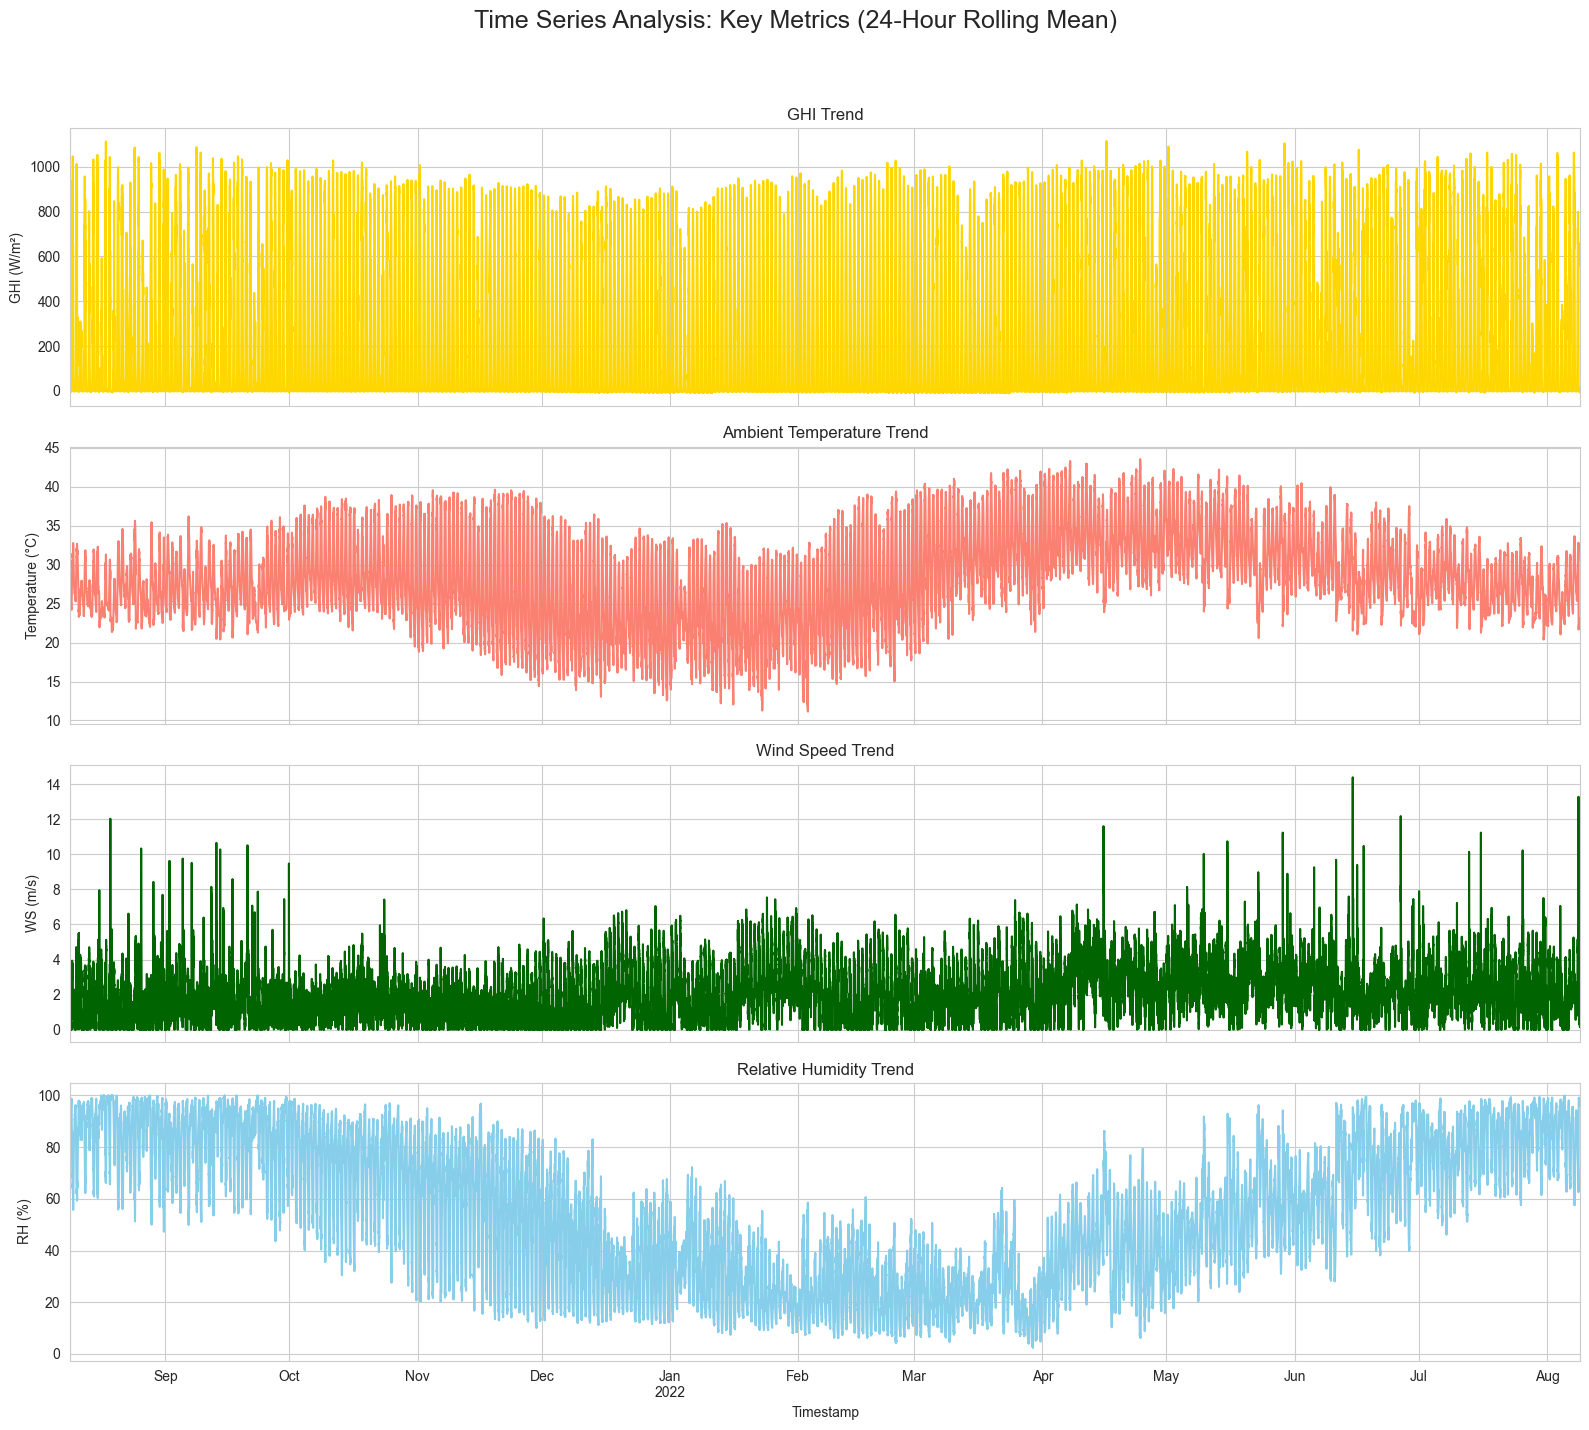

In [12]:

fig, axes = plt.subplots(4, 1, figsize=(16, 15), sharex=True)
fig.suptitle('Time Series Analysis: Key Metrics (24-Hour Rolling Mean)', fontsize=18)

# Plot 1: Global Horizontal Irradiance (GHI)
df['GHI'].rolling(window=24).mean().plot(ax=axes[0], title='GHI Trend', color='gold')
axes[0].set_ylabel('GHI (W/m²)')

# Plot 2: Ambient Temperature (Tamb)
df['Tamb'].rolling(window=24).mean().plot(ax=axes[1], title='Ambient Temperature Trend', color='salmon')
axes[1].set_ylabel('Temperature (°C)')

# Plot 3: Wind Speed (WS)
df['WS'].rolling(window=24).mean().plot(ax=axes[2], title='Wind Speed Trend', color='darkgreen')
axes[2].set_ylabel('WS (m/s)')

# Plot 4: Relative Humidity (RH)
df['RH'].rolling(window=24).mean().plot(ax=axes[3], title='Relative Humidity Trend', color='skyblue')
axes[3].set_ylabel('RH (%)')
axes[3].set_xlabel('Timestamp')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Hourly pattern visualization

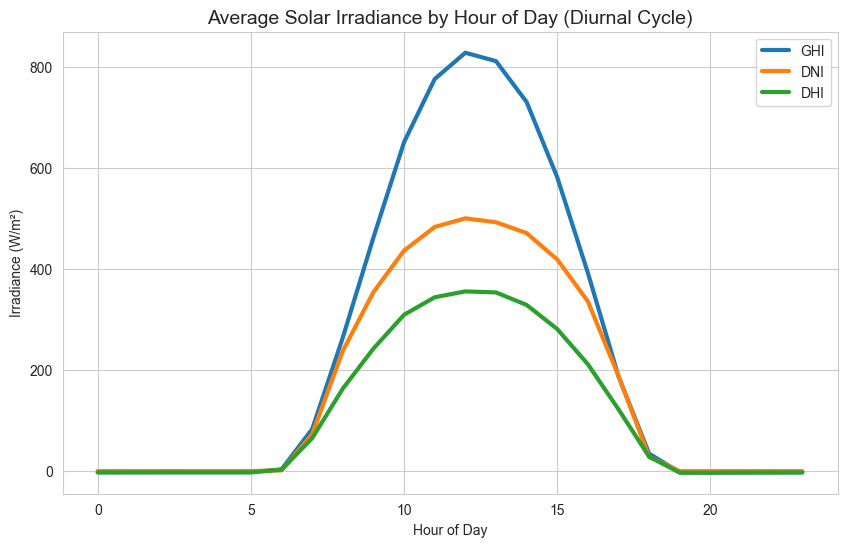

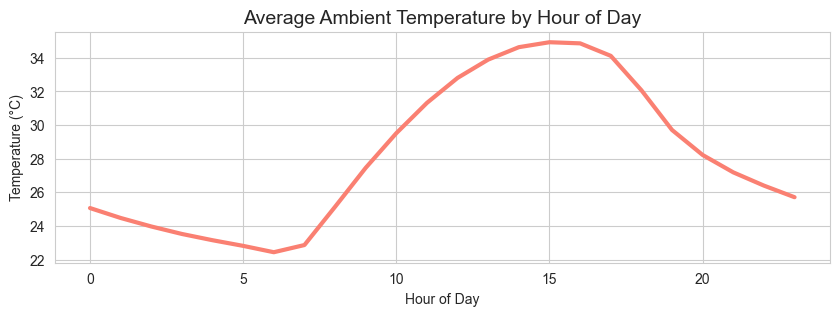

In [14]:
df['Hour'] = df.index.hour
hourly_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

fig, ax = plt.subplots(figsize=(10, 6))
hourly_avg[['GHI', 'DNI', 'DHI']].plot(ax=ax, linewidth=3)
ax.set_title('Average Solar Irradiance by Hour of Day (Diurnal Cycle)', fontsize=14)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Irradiance (W/m²)')
ax.grid(True)
plt.show()

# Plot Temperature separately
fig, ax = plt.subplots(figsize=(10, 3))
hourly_avg['Tamb'].plot(ax=ax, color='salmon', linewidth=3)
ax.set_title('Average Ambient Temperature by Hour of Day', fontsize=14)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Temperature (°C)')
ax.grid(True)
plt.show()

Reload data and flag outliers comparison

In [15]:

print("Reloading raw data for cleaning impact analysis...")

# Use a new variable (df_impact) to keep the data raw initially
file_path = '../data/benin-malanville.csv'
df_impact = pd.read_csv(file_path)
df_impact['Timestamp'] = pd.to_datetime(df_impact['Timestamp'], format='%Y-%m-%d %H:%M')
df_impact = df_impact.set_index('Timestamp')

# Define Target Columns and Z-Score Calculation
Z_SCORE_COLS = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
IMPUTATION_COLS = Z_SCORE_COLS + ['Tamb', 'RH', 'BP']

# 1. Create a "Cleaning_Flag" on the raw data (df_impact)
for col in Z_SCORE_COLS:
    if df_impact[col].std() != 0:
        z_scores = np.abs((df_impact[col] - df_impact[col].mean()) / df_impact[col].std())
        df_impact[f'{col}_ZScore'] = z_scores
    else:
        df_impact[f'{col}_ZScore'] = 0

outlier_condition = (df_impact[[f'{col}_ZScore' for col in Z_SCORE_COLS]] > 3).any(axis=1)
df_impact['Cleaning_Flag'] = outlier_condition # THIS IS THE FLAG FOR THE PLOT

# Drop temporary ZScore columns
df_impact = df_impact.drop(columns=[f'{col}_ZScore' for col in Z_SCORE_COLS])


# 2. Apply Imputation and store the result in new '_Clean' columns
for col in IMPUTATION_COLS:
    # Use the original column data for the median to ensure consistency
    median_val = df_impact[col].median() 
    # Store the cleaned values in a new column (e.g., 'ModA_Clean')
    df_impact[f'{col}_Clean'] = df_impact[col].fillna(median_val)
    
print(f"Data reloaded. {df_impact['Cleaning_Flag'].sum()} rows flagged. Cleaned columns created for comparison.")

Reloading raw data for cleaning impact analysis...
Data reloaded. 7740 rows flagged. Cleaned columns created for comparison.


Group and plot impact

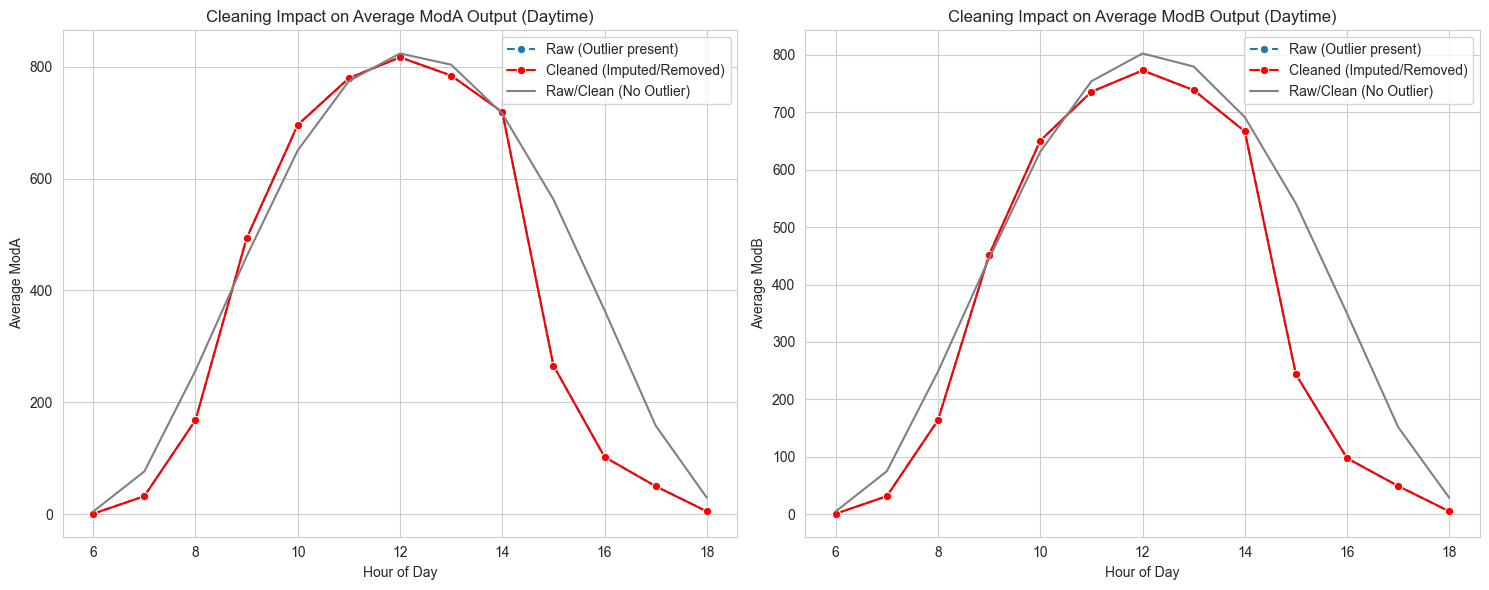

In [16]:
# --------------------------------------------------------
# Step 8.B: Cleaning Impact Plot
# --------------------------------------------------------

# Group by the hour and the cleaning flag, then calculate the mean for each group
impact_data = df_impact.copy()
impact_data['Hour'] = impact_data.index.hour

# Calculate the mean of the raw (ModA/ModB) and cleaned (ModA_Clean/ModB_Clean) columns
hourly_impact = impact_data.groupby(['Hour', 'Cleaning_Flag'])[['ModA', 'ModB', 'ModA_Clean', 'ModB_Clean']].mean().reset_index()

# Filter for only the hours where solar generation is expected (daytime)
hourly_impact = hourly_impact[(hourly_impact['Hour'] >= 6) & (hourly_impact['Hour'] <= 18)]

plt.figure(figsize=(15, 6))

# Plot 1: Impact on ModA
plt.subplot(1, 2, 1)
# 1. Plot raw data flagged as TRUE (Outlier present)
sns.lineplot(data=hourly_impact[hourly_impact['Cleaning_Flag'] == True], x='Hour', y='ModA', label='Raw (Outlier present)', linestyle='--', marker='o')
# 2. Plot cleaned data flagged as TRUE (Where the change happens)
sns.lineplot(data=hourly_impact[hourly_impact['Cleaning_Flag'] == True], x='Hour', y='ModA_Clean', label='Cleaned (Imputed/Removed)', linestyle='-', marker='o', color='red')
# 3. Plot the data not flagged (The baseline, should show little change)
sns.lineplot(data=hourly_impact[hourly_impact['Cleaning_Flag'] == False], x='Hour', y='ModA', label='Raw/Clean (No Outlier)', linestyle='-', color='gray')

plt.title('Cleaning Impact on Average ModA Output (Daytime)')
plt.ylabel('Average ModA')
plt.xlabel('Hour of Day')
plt.legend()

# Plot 2: Impact on ModB (Repeat for ModB)
plt.subplot(1, 2, 2)
sns.lineplot(data=hourly_impact[hourly_impact['Cleaning_Flag'] == True], x='Hour', y='ModB', label='Raw (Outlier present)', linestyle='--', marker='o')
sns.lineplot(data=hourly_impact[hourly_impact['Cleaning_Flag'] == True], x='Hour', y='ModB_Clean', label='Cleaned (Imputed/Removed)', linestyle='-', marker='o', color='red')
sns.lineplot(data=hourly_impact[hourly_impact['Cleaning_Flag'] == False], x='Hour', y='ModB', label='Raw/Clean (No Outlier)', linestyle='-', color='gray')

plt.title('Cleaning Impact on Average ModB Output (Daytime)')
plt.ylabel('Average ModB')
plt.xlabel('Hour of Day')
plt.legend()

plt.tight_layout()
plt.show()

Observation 

1.  **Outlier Presence:**
    * The `Raw (Outlier present)` line (dashed line) shows the average values for rows that contained an extreme outlier in any of the sensor columns (`GHI`, `DNI`, `DHI`, `ModA`, `ModB`, `WS`, `WSgust`).
    * **Significant Impact:** For both `ModA` and `ModB`, the raw outlier data shows a **spike in average power output** during the hours of **12:00 (noon) to 14:00**. This suggests the outliers were primarily positive errors (false high readings).

2.  **Effect of Cleaning:**
    * The `Cleaned (Imputed/Removed)` line (solid red line) represents the average after the median imputation was applied.
    * The cleaning process successfully **pulled the spiked average values down** to align closely with the `Raw/Clean (No Outlier)` gray line.
    * This confirms that the cleaning method was effective at **neutralizing the bias** introduced by the extreme positive outliers, making the cleaned data much more representative of the true solar generation profile.

3.  **No Outlier Data:**
    * The `Raw/Clean (No Outlier)` line (solid gray line) shows virtually **no change** between the raw and cleaned values, which is the expected outcome and validates that the imputation only targeted the affected data points.



Correlation and Relationship analysis

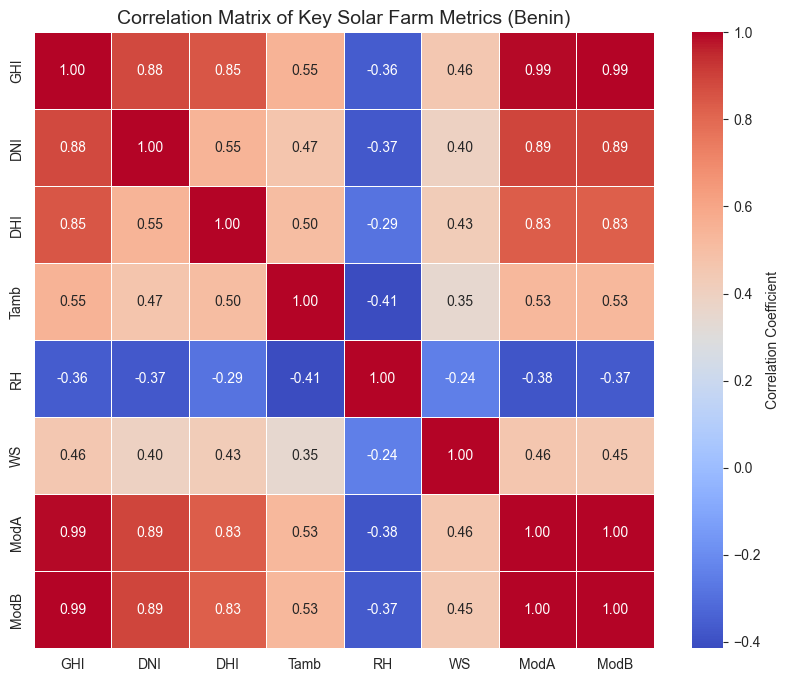

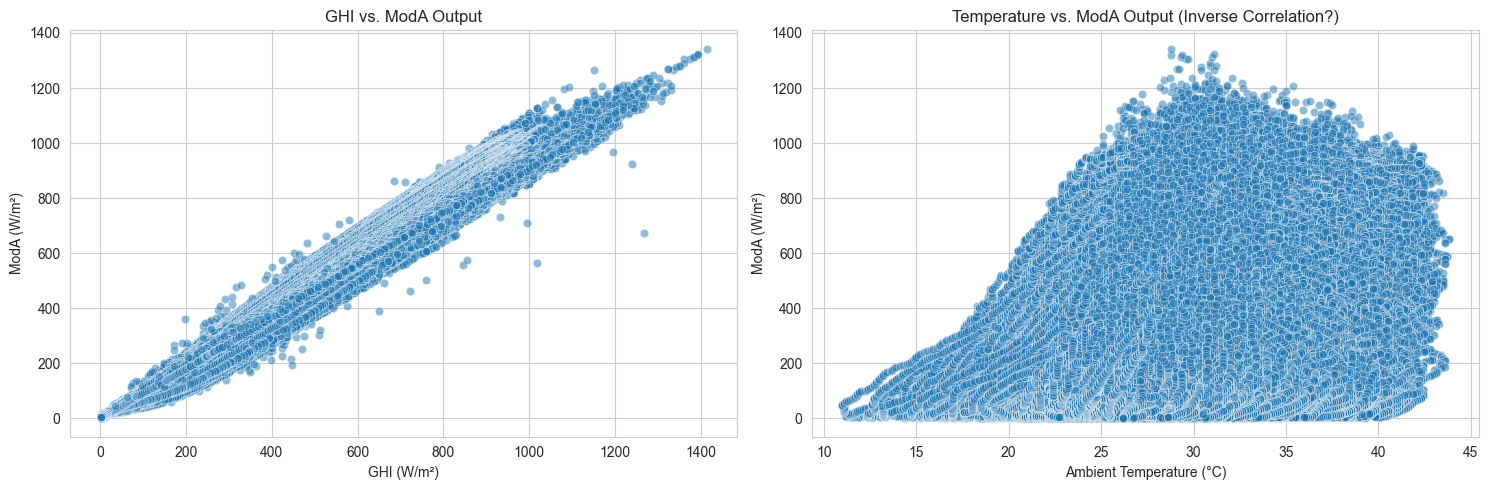

In [17]:

correlation_cols = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'ModA', 'ModB']

# 1. Calculate the Correlation Matrix
corr_matrix = df[correlation_cols].corr()

# 2. Visualize the Correlation Matrix using a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            linewidths=.5, 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Key Solar Farm Metrics (Benin)', fontsize=14)
plt.show()

df_daylight = df[df['GHI'] > 1]

plt.figure(figsize=(15, 5))

# Scatter Plot 1: GHI vs. ModA
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_daylight['GHI'], y=df_daylight['ModA'], alpha=0.5)
plt.title('GHI vs. ModA Output')
plt.xlabel('GHI (W/m²)')
plt.ylabel('ModA (W/m²)')

# Scatter Plot 2: Temperature vs. ModA
plt.subplot(1, 2, 2)
sns.scatterplot(x=df_daylight['Tamb'], y=df_daylight['ModA'], alpha=0.5)
plt.title('Temperature vs. ModA Output (Inverse Correlation?)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('ModA (W/m²)')

plt.tight_layout()
plt.show()

Wind and distribution analysis

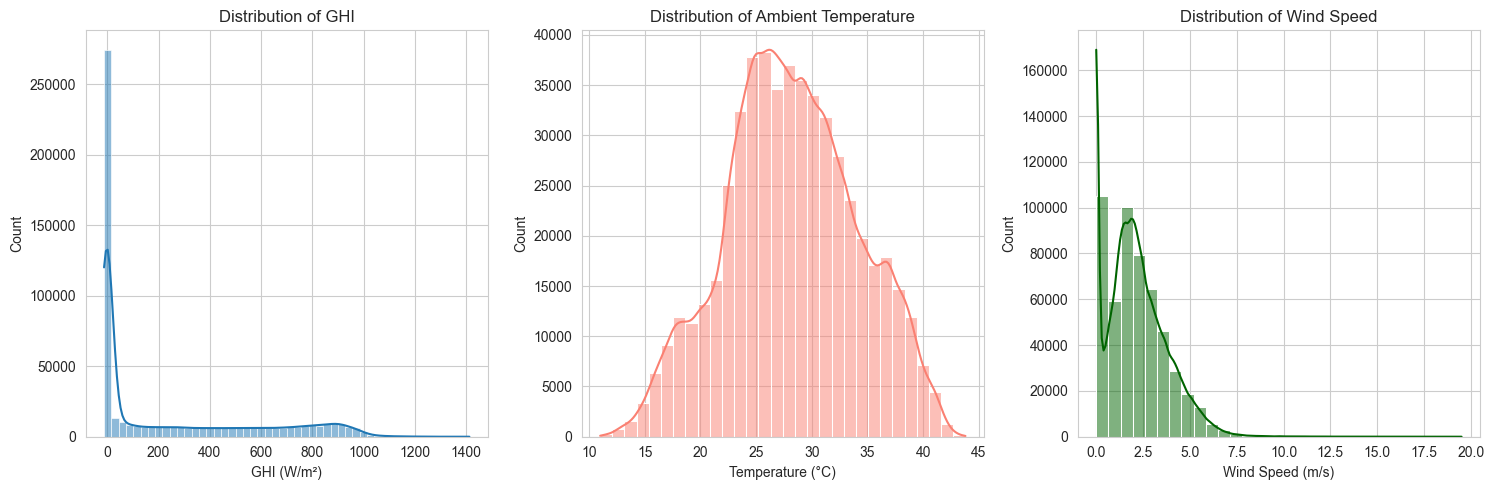

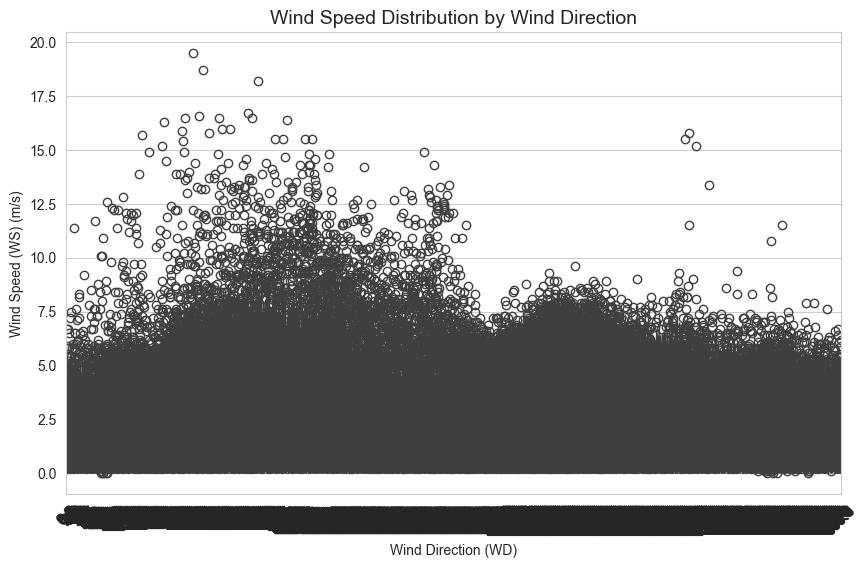

In [18]:


plt.figure(figsize=(15, 5))

# Plot 1: Distribution of Global Horizontal Irradiance (GHI)
plt.subplot(1, 3, 1)
sns.histplot(df['GHI'], kde=True, bins=50)
plt.title('Distribution of GHI', fontsize=12)
plt.xlabel('GHI (W/m²)')

# Plot 2: Distribution of Ambient Temperature (Tamb)
plt.subplot(1, 3, 2)
sns.histplot(df['Tamb'], kde=True, bins=30, color='salmon')
plt.title('Distribution of Ambient Temperature', fontsize=12)
plt.xlabel('Temperature (°C)')

# Plot 3: Distribution of Wind Speed (WS)
plt.subplot(1, 3, 3)
sns.histplot(df['WS'], kde=True, bins=30, color='darkgreen')
plt.title('Distribution of Wind Speed', fontsize=12)
plt.xlabel('Wind Speed (m/s)')

plt.tight_layout()
plt.show()


# 2. Wind Rose Plot (Directional Analysis)
# This shows the frequency of wind direction (WD) at certain speeds (WS)
# NOTE: This requires installing the 'windrose' library if you want a dedicated wind rose plot.
# If windrose is not installed, we can use a boxplot for directional statistics:

# Create Wind Speed Bins
df['WS_Bins'] = pd.cut(df['WS'], bins=[-0.1, 1, 3, 6, 9, df['WS'].max()], 
                       labels=['Calm (0-1)', 'Light (1-3)', 'Moderate (3-6)', 'Strong (6-9)', 'High (>9)'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='WD', y='WS', data=df, order=sorted(df['WD'].dropna().unique()))
plt.title('Wind Speed Distribution by Wind Direction', fontsize=14)
plt.xlabel('Wind Direction (WD)')
plt.ylabel('Wind Speed (WS) (m/s)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

Temperature Analysis

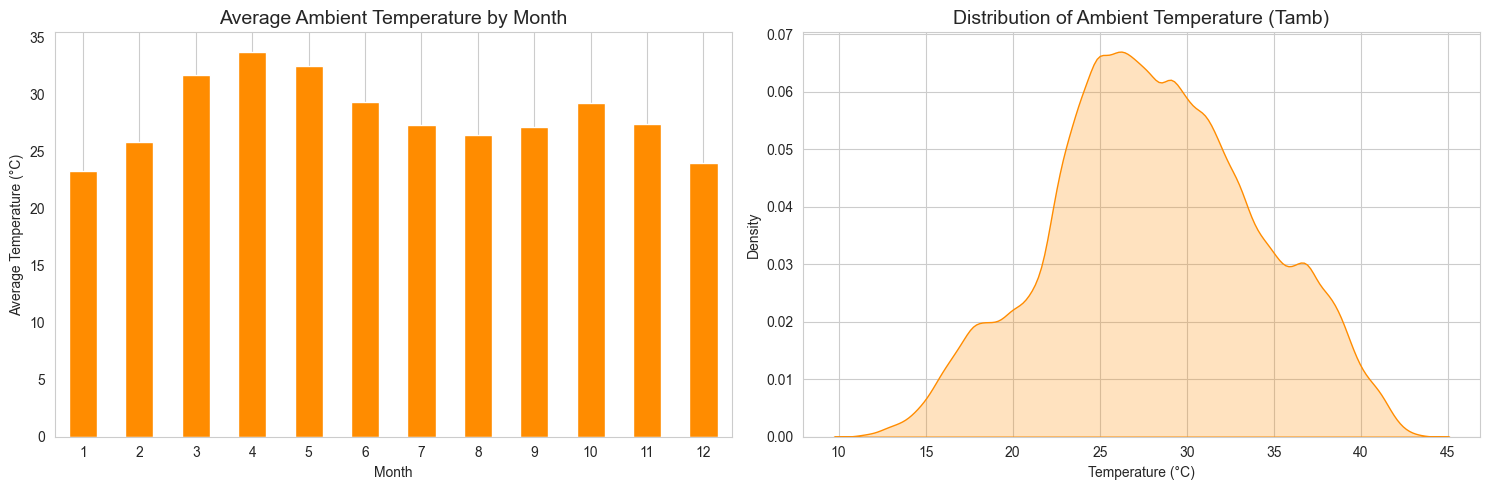

In [19]:


plt.figure(figsize=(15, 5))

# Plot 1: Monthly Average Temperature (Seasonal Trend)
df['Month'] = df.index.month
monthly_temp = df.groupby('Month')['Tamb'].mean()

plt.subplot(1, 2, 1)
monthly_temp.plot(kind='bar', color='darkorange')
plt.title('Average Ambient Temperature by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Plot 2: Temperature Distribution (Variation)
plt.subplot(1, 2, 2)
sns.kdeplot(df['Tamb'], fill=True, color='darkorange')
plt.title('Distribution of Ambient Temperature (Tamb)', fontsize=14)
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Drop the temporary 'Month' column
df = df.drop(columns=['Month'])

Bubble Chart

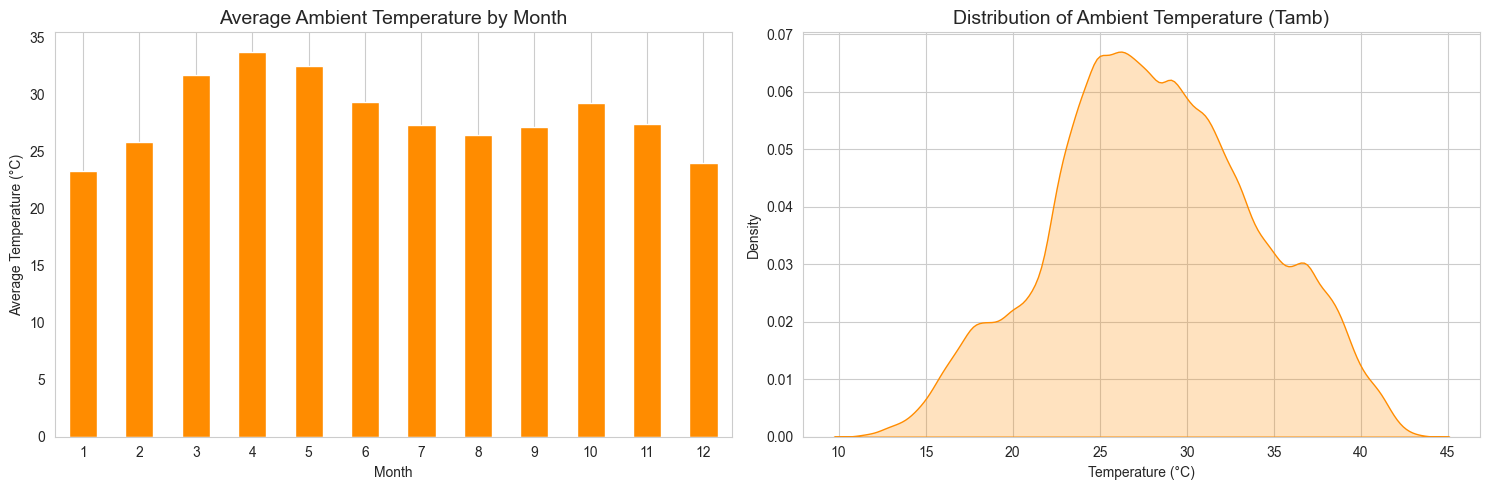

In [20]:


plt.figure(figsize=(15, 5))

# Plot 1: Monthly Average Temperature (Seasonal Trend)
df['Month'] = df.index.month
monthly_temp = df.groupby('Month')['Tamb'].mean()

plt.subplot(1, 2, 1)
monthly_temp.plot(kind='bar', color='darkorange')
plt.title('Average Ambient Temperature by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Plot 2: Temperature Distribution (Variation)
plt.subplot(1, 2, 2)
sns.kdeplot(df['Tamb'], fill=True, color='darkorange')
plt.title('Distribution of Ambient Temperature (Tamb)', fontsize=14)
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Drop the temporary 'Month' column
df = df.drop(columns=['Month'])